In [14]:
from pathlib import Path
import sys

import matplotlib.pyplot as plt
import torch

project_root = Path.cwd()
if project_root.name == 'visualize':
    project_root = project_root.parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

# Clear Jupyter's argv to avoid argparse conflicts
if hasattr(sys, 'argv'):
    original_argv = sys.argv.copy()
    sys.argv = [sys.argv[0]]

from datawrapper.datawrapper import LoaderConfig, get_data_wrapper_loader
from params import GeneralConfig

# Restore original argv
if 'original_argv' in locals():
    sys.argv = original_argv


In [15]:
cfg = GeneralConfig()
cfg.debugmode = True
cfg.train_batch = 1
cfg.num_workers = 1

loader_cfg = LoaderConfig(
    batch=cfg.train_batch,
    num_workers=cfg.num_workers,
    shuffle=False,
    debug_mode=cfg.debugmode,
    acs_num=cfg.acs_num,
    parallel_factor=cfg.parallel_factor,
    data_type=cfg.data_type,
    subject_num=cfg.subject_num,
    train_percent=cfg.train_percent,
    slice_per_subject=cfg.slice_per_subject,
)


In [16]:
i=0

In [17]:
train_loader, train_dataset, train_len = get_data_wrapper_loader(
    # file_path=cfg.train_dataset,
    file_path = ["/fast_storage/intern/data/instruction_tuning/fastmri_acceleration_mat/train"],
    training_mode=True,
    loader_cfg=loader_cfg,
    split="train",
)
print(f"Loaded {train_len} samples from {cfg.train_dataset}")


batch = list(train_loader)[i]
i+=1
inputs, targets, text_tokens, instruction_tokens = batch


DataWrapper initialized with 1 samples.
Working directory: ['/fast_storage/intern/data/instruction_tuning/fastmri_acceleration_mat/train']
Loaded 1 samples from ['/fast_storage/intern/data/instruction_tuning/brats_crossmodal_mat/train', '/fast_storage/intern/data/instruction_tuning/brats_segmentation_mat/train', '/fast_storage/intern/data/instruction_tuning/fastmri_acceleration_mat/train', '/fast_storage/intern/data/instruction_tuning/oasis3_longitudinal_mat/train']


In [18]:
torch.set_printoptions(precision=4, sci_mode=False)

print("inputs tensor (shape, dtype):", inputs.shape, inputs.dtype)
print(inputs[0].cpu())

print("\n targets tensor (shape, dtype):", targets.shape, targets.dtype)
print(targets[0].cpu())

print("\n text_tokens tensor (shape, dtype):", text_tokens.shape, text_tokens.dtype)
print(text_tokens[0].cpu())

print("\n instruction_tokens tensor (shape, dtype):", instruction_tokens.shape, instruction_tokens.dtype)
print(instruction_tokens[0].cpu())


inputs tensor (shape, dtype): torch.Size([1, 1, 512, 512]) torch.float32
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

 targets tensor (shape, dtype): torch.Size([1, 1, 512, 512]) torch.float32
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

 text_tokens tensor (shape, dtype): torch.Size([1, 1536]) torch.int32
tensor([49406,   283,  1874,  ...,     0,     0,     0], dtype=torch.int32)

 instruction_tokens tensor (shape, dtype): torch.Size([1, 1536]) torch.int32
tensor([49406,   515, 24467,  ...,     0,     0,     0], dtype=torch.int32)


In [19]:
unique_values = torch.unique(inputs[0,0])
print("Unique values in inputs:")
print(unique_values)
print(f"Number of unique values in inputs: {len(unique_values)}")

unique_values_targets = torch.unique(targets[0,0])
print("Unique values in targets:")
print(unique_values_targets)
print(f"Number of unique values in targets: {len(unique_values_targets)}")

# Check unique after rounding to 4 decimal places
rounded_inputs = torch.round(inputs[0,0] * 10000) / 10000
unique_rounded_inputs = torch.unique(rounded_inputs)
print(f"Unique values in inputs after rounding to 4 decimals: {len(unique_rounded_inputs)}")
print(unique_rounded_inputs)

rounded_targets = torch.round(targets[0,0] * 10000) / 10000
unique_rounded_targets = torch.unique(rounded_targets)
print(f"Unique values in targets after rounding to 4 decimals: {len(unique_rounded_targets)}")
print(unique_rounded_targets)



Unique values in inputs:
tensor([    0.0000,     0.0000,     0.0000,  ...,     3.6530,     3.7264,
            3.7403])
Number of unique values in inputs: 210071
Unique values in targets:
tensor([-0.8432, -0.8430, -0.8429,  ...,  4.1918,  4.1978,  4.2748])
Number of unique values in targets: 110591
Unique values in inputs after rounding to 4 decimals: 25258
tensor([    0.0000,     0.0001,     0.0002,  ...,     3.6530,     3.7264,
            3.7403])
Unique values in targets after rounding to 4 decimals: 30916
tensor([-0.8432, -0.8430, -0.8429,  ...,  4.1918,  4.1978,  4.2748])


In [20]:
unique_values_targets = torch.unique(targets[0,0])
print(targets[0,0].shape)
for i in range(512):
    unique_vals = torch.unique(targets[0,0,i])
    print(f"Slice {i}: Unique values: {len(unique_vals)}")
print("\n Unique values in targets[0,0]:", unique_values_targets)

torch.Size([512, 512])
Slice 0: Unique values: 139
Slice 1: Unique values: 375
Slice 2: Unique values: 371
Slice 3: Unique values: 369
Slice 4: Unique values: 374
Slice 5: Unique values: 382
Slice 6: Unique values: 369
Slice 7: Unique values: 387
Slice 8: Unique values: 386
Slice 9: Unique values: 372
Slice 10: Unique values: 392
Slice 11: Unique values: 392
Slice 12: Unique values: 380
Slice 13: Unique values: 387
Slice 14: Unique values: 382
Slice 15: Unique values: 374
Slice 16: Unique values: 375
Slice 17: Unique values: 378
Slice 18: Unique values: 386
Slice 19: Unique values: 381
Slice 20: Unique values: 380
Slice 21: Unique values: 379
Slice 22: Unique values: 385
Slice 23: Unique values: 384
Slice 24: Unique values: 389
Slice 25: Unique values: 382
Slice 26: Unique values: 383
Slice 27: Unique values: 388
Slice 28: Unique values: 379
Slice 29: Unique values: 381
Slice 30: Unique values: 391
Slice 31: Unique values: 399
Slice 32: Unique values: 399
Slice 33: Unique values: 399
S

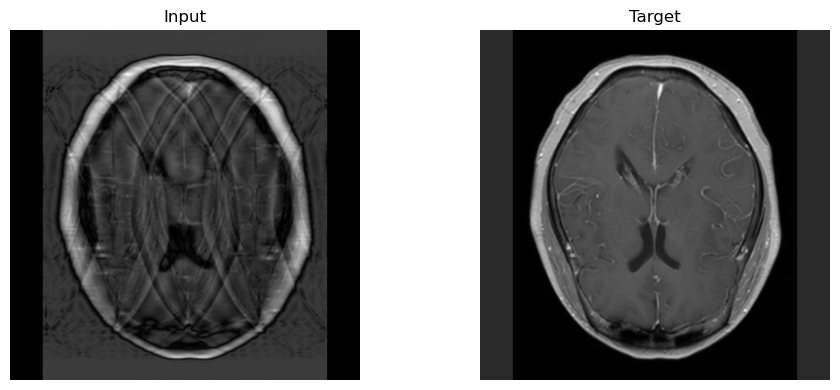

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].imshow(inputs[0, 0].cpu(), cmap="gray")
axes[0].set_title("Input")
axes[0].axis("off")

axes[1].imshow(targets[0, 0].cpu(), cmap="gray")
axes[1].set_title("Target")
axes[1].axis("off")

plt.tight_layout()
